### Creating a project in SlideFlow for GC / non GC

In [15]:
import slideflow as sf
import os

os.environ["SF_SLIDE_BACKEND"] = "libvips"
os.environ["SF_BACKEND"] = "torch"

In [16]:
project_name = 'slideflow_Lyon_TCGA'
csv_path = "annotations/annotations_Lyon_TCGA_37_dataset.csv"
images_path = '/media/user/Blake/Projet Ovaires/Lyon_TCGA'

try:
  project = sf.create_project(
    root = project_name,     # name of the project's folder
    annotations = csv_path,  # csv with binary labels
    slides = images_path     # folder with ndpi files
  )
except OSError:
  print("Project already created.")

Project already created.


#### Dataset

In [18]:
project = sf.load_project(project_name)
dataset = project.dataset(tile_px=224, tile_um='45x', sources=['MyProject'])

## Don't run if already created tiles

In [1]:
dataset.extract_tiles(qc='otsu')

#### Extract features

In [20]:
from slideflow.model import build_feature_extractor

resnet50 = build_feature_extractor(
    'resnet50_imagenet',
    tile_px=224
)

features = sf.DatasetFeatures(resnet50, dataset)

[14:29:57] INFO     Feature extractor resnet50_imagenet available in both Tensorflow and PyTorch backends; using   
                    active backend torch

           INFO     Calculating activations for 18 tfrecords

           INFO     Generating from <TorchImagenetLayerExtractor model=resnet50 layers=['postconv']                
                    n_features=2048>

In [14]:
# We save them in an external folder since the features are the same for any classification project
features.to_torch(f'{project_name}/bags')

[13:58:02] WARNING  Feature extraction configuration does not match the configuration used to generate the existing
                    bags at slideflow_Lyon_TCGA/bags. Current configuration will not be saved.

           INFO     Activations exported in Torch format to slideflow_Lyon_TCGA/bags

In [7]:
dataset.summary()

Overview:
╒═════════════════════╤═══════════════════════════════════╕
│ Configuration file: │ slideflow_Lyon_TCGA/datasets.json │
│ Tile size (px):     │ 224                               │
│ Tile size (um):     │ 40x                               │
│ Slides:             │ 37                                │
│ Patients:           │ 37                                │
│ Slides with ROIs:   │ 0                                 │
│ Patients with ROIs: │ 0                                 │
╘═════════════════════╧═══════════════════════════════════╛

Filters:
╒═══════════════╤════╕
│ Filters:      │ {} │
├───────────────┼────┤
│ Filter Blank: │ [] │
├───────────────┼────┤
│ Min Tiles:    │ 0  │
╘═══════════════╧════╛

Sources:

MyProject
╒═══════════╤═════════════════════════════════════════════════╕
│ slides    │ /media/user/Blake/Projet Ovaires/Lyon_TCGA      │
│ roi       │ /media/user/Blake/Projet Ovaires/Lyon_TCGA/rois │
│ tiles     │ slideflow_Lyon_TCGA/tiles                       │
│ 

#### Model configuration and training

[17:40:18] INFO     Training FastAI MIL model with config:

           INFO     TrainerConfigFastAI(                                                                           
                      aggregation_level='slide'                                                                    
                      lr=0.001                                                                                     
                      wd=1e-05                                                                                     
                      bag_size=512                                                                                 
                      fit_one_cycle=True                                                                           
                      epochs=15                                                                                    
                      batch_size=64                                                                                
                      drop_last=True                                                                               
                      save_monitor='valid_loss'                                                                    
                      model='clam_sb'                                                                              
                      model_size='small'                                                                           
                      bag_loss='ce'                                                                                
                      bag_weight=0.7                                                                               
                      dropout=True                                                                                 
                      opt='adam'                                                                                   
                      inst_loss='ce'                                                                               
                      no_inst_cluster=False                                                                        
                      B=8                                                                                          
                      model_kwargs=None                                                                            
                    )

           INFO     Training dataset: 30 merged bags (from 30 possible slides)

           INFO     Validation dataset: 7 merged bags (from 7 possible slides)

[17:40:19] INFO     Training model CLAM_SB (size=[2048, 512, 256], loss=CrossEntropyWithInstanceLoss)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.661129,0.616969,0.916667,00:05
1,0.531090,0.402488,0.916667,00:05
2,0.606376,0.639863,0.916667,00:05
3,0.476086,0.353800,0.916667,00:05
4,0.363254,0.283190,0.833333,00:05
5,0.285083,0.362851,1.000000,00:05
6,0.194009,0.295524,1.000000,00:05
7,0.151047,0.091523,1.000000,00:05
8,0.182067,0.094953,1.000000,00:05
9,0.127610,0.159034,1.000000,00:05


Better model found at epoch 0 with valid_loss value: 0.6169690489768982.
Better model found at epoch 1 with valid_loss value: 0.40248849987983704.
Better model found at epoch 3 with valid_loss value: 0.35380032658576965.
Better model found at epoch 4 with valid_loss value: 0.28318968415260315.
Better model found at epoch 7 with valid_loss value: 0.09152311086654663.


[17:41:38] INFO     Predictions saved to slideflow_Lyon_TCGA/mil/00000-clam_sb-category/predictions.parquet

           INFO     Validation metrics for outcome category:

           INFO     slide-level AUC (cat # 0): 1.000 AP: 1.000 (opt. threshold: 0.824)

           INFO     slide-level AUC (cat # 1): 1.000 AP: 1.000 (opt. threshold: 0.635)

           INFO     Category 0 acc: 100.0% (4/4)

           INFO     Category 1 acc: 100.0% (3/3)

           INFO     Attention scores exported to                                                                   
                    slideflow_Lyon_TCGA/mil/00000-clam_sb-category/attention/TCGA-57-1992-01Z-00-DX1.1022B1ED-3DC1-
                    4F71-8635-0F8B28138B8C_att.npz

[17:41:39] INFO     Training FastAI MIL model with config:

           INFO     TrainerConfigFastAI(                                                                           
                      aggregation_level='slide'                                                                    
                      lr=0.001                                                                                     
                      wd=1e-05                                                                                     
                      bag_size=512                                                                                 
                      fit_one_cycle=True                                                                           
                      epochs=15                                                                                    
                      batch_size=64                                                                                
                      drop_last=True                                                                               
                      save_monitor='valid_loss'                                                                    
                      model='clam_sb'                                                                              
                      model_size='small'                                                                           
                      bag_loss='ce'                                                                                
                      bag_weight=0.7                                                                               
                      dropout=True                                                                                 
                      opt='adam'                                                                                   
                      inst_loss='ce'                                                                               
                      no_inst_cluster=False                                                                        
                      B=8                                                                                          
                      model_kwargs=None                                                                            
                    )

           INFO     Training dataset: 30 merged bags (from 30 possible slides)

           INFO     Validation dataset: 7 merged bags (from 7 possible slides)

           INFO     Training model CLAM_SB (size=[2048, 512, 256], loss=CrossEntropyWithInstanceLoss)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.671459,0.634614,0.583333,00:04
1,0.522172,0.548540,0.833333,00:04
2,0.406133,0.873033,0.750000,00:04
3,0.289712,0.760725,0.916667,00:04
4,0.243096,0.240812,0.916667,00:04
5,0.223548,0.917824,0.916667,00:04
6,0.154456,0.492890,0.833333,00:04
7,0.092479,0.310152,0.833333,00:04
8,0.055069,0.348829,0.833333,00:04
9,0.033313,0.363111,0.833333,00:04


Better model found at epoch 0 with valid_loss value: 0.6346144676208496.
Better model found at epoch 1 with valid_loss value: 0.5485396385192871.
Better model found at epoch 4 with valid_loss value: 0.2408123016357422.


[17:42:53] INFO     Predictions saved to slideflow_Lyon_TCGA/mil/00001-clam_sb-category/predictions.parquet

           INFO     Validation metrics for outcome category:

           INFO     slide-level AUC (cat # 0): 0.917 AP: 0.917 (opt. threshold: 0.301)

           INFO     slide-level AUC (cat # 1): 0.917 AP: 0.950 (opt. threshold: 0.700)

           INFO     Category 0 acc: 66.7% (2/3)

           INFO     Category 1 acc: 100.0% (4/4)

           INFO     Attention scores exported to                                                                   
                    slideflow_Lyon_TCGA/mil/00001-clam_sb-category/attention/TCGA-25-2390-01Z-00-DX1.BC83304E-747C-
                    47EC-BD80-BA0B322C8630_att.npz

           INFO     Training FastAI MIL model with config:

           INFO     TrainerConfigFastAI(                                                                           
                      aggregation_level='slide'                                                                    
                      lr=0.001                                                                                     
                      wd=1e-05                                                                                     
                      bag_size=512                                                                                 
                      fit_one_cycle=True                                                                           
                      epochs=15                                                                                    
                      batch_size=64                                                                                
                      drop_last=True                                                                               
                      save_monitor='valid_loss'                                                                    
                      model='clam_sb'                                                                              
                      model_size='small'                                                                           
                      bag_loss='ce'                                                                                
                      bag_weight=0.7                                                                               
                      dropout=True                                                                                 
                      opt='adam'                                                                                   
                      inst_loss='ce'                                                                               
                      no_inst_cluster=False                                                                        
                      B=8                                                                                          
                      model_kwargs=None                                                                            
                    )

           INFO     Training dataset: 30 merged bags (from 30 possible slides)

           INFO     Validation dataset: 7 merged bags (from 7 possible slides)

           INFO     Training model CLAM_SB (size=[2048, 512, 256], loss=CrossEntropyWithInstanceLoss)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.709958,0.621443,0.833333,00:05
1,0.593359,0.676871,0.833333,00:05
2,0.577858,0.339464,0.916667,00:05
3,0.518767,0.304581,1.000000,00:05
4,0.430165,0.177171,1.000000,00:05
5,0.321162,0.161065,1.000000,00:05
6,0.253246,0.076895,1.000000,00:05
7,0.179834,0.121435,1.000000,00:05
8,0.146659,0.111765,1.000000,00:05
9,0.096345,0.012742,1.000000,00:05


Better model found at epoch 0 with valid_loss value: 0.6214432716369629.
Better model found at epoch 2 with valid_loss value: 0.33946365118026733.
Better model found at epoch 3 with valid_loss value: 0.3045806884765625.
Better model found at epoch 4 with valid_loss value: 0.17717072367668152.
Better model found at epoch 5 with valid_loss value: 0.1610645055770874.
Better model found at epoch 6 with valid_loss value: 0.07689547538757324.
Better model found at epoch 9 with valid_loss value: 0.012741544283926487.
Better model found at epoch 13 with valid_loss value: 0.01215849258005619.
Better model found at epoch 14 with valid_loss value: 0.011272123083472252.


[17:44:17] INFO     Predictions saved to slideflow_Lyon_TCGA/mil/00002-clam_sb-category/predictions.parquet

           INFO     Validation metrics for outcome category:

           INFO     slide-level AUC (cat # 0): 1.000 AP: 1.000 (opt. threshold: 0.944)

           INFO     slide-level AUC (cat # 1): 1.000 AP: 1.000 (opt. threshold: 0.990)

           INFO     Category 0 acc: 100.0% (3/3)

           INFO     Category 1 acc: 100.0% (4/4)

           INFO     Attention scores exported to                                                                   
                    slideflow_Lyon_TCGA/mil/00002-clam_sb-category/attention/TCGA-25-1329-01Z-00-DX1.6DD994F3-E426-
                    4749-8ECA-9A0B87FF04DC_att.npz

           INFO     Training FastAI MIL model with config:

           INFO     TrainerConfigFastAI(                                                                           
                      aggregation_level='slide'                                                                    
                      lr=0.001                                                                                     
                      wd=1e-05                                                                                     
                      bag_size=512                                                                                 
                      fit_one_cycle=True                                                                           
                      epochs=15                                                                                    
                      batch_size=64                                                                                
                      drop_last=True                                                                               
                      save_monitor='valid_loss'                                                                    
                      model='clam_sb'                                                                              
                      model_size='small'                                                                           
                      bag_loss='ce'                                                                                
                      bag_weight=0.7                                                                               
                      dropout=True                                                                                 
                      opt='adam'                                                                                   
                      inst_loss='ce'                                                                               
                      no_inst_cluster=False                                                                        
                      B=8                                                                                          
                      model_kwargs=None                                                                            
                    )

           INFO     Training dataset: 30 merged bags (from 30 possible slides)

           INFO     Validation dataset: 7 merged bags (from 7 possible slides)

           INFO     Training model CLAM_SB (size=[2048, 512, 256], loss=CrossEntropyWithInstanceLoss)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.704687,0.622868,0.833333,00:05
1,0.646982,0.492398,1.000000,00:05
2,0.561348,0.406242,1.000000,00:05
3,0.426863,0.104536,1.000000,00:05
4,0.294840,0.074368,1.000000,00:05
5,0.196887,0.153800,1.000000,00:05
6,0.214790,0.096775,1.000000,00:05
7,0.133148,0.016251,1.000000,00:05
8,0.082794,0.452597,1.000000,00:05
9,0.049859,0.244212,1.000000,00:05


Better model found at epoch 0 with valid_loss value: 0.6228683590888977.
Better model found at epoch 1 with valid_loss value: 0.492398202419281.
Better model found at epoch 2 with valid_loss value: 0.40624234080314636.
Better model found at epoch 3 with valid_loss value: 0.10453628748655319.
Better model found at epoch 4 with valid_loss value: 0.0743684247136116.
Better model found at epoch 7 with valid_loss value: 0.01625104434788227.


[17:45:43] INFO     Predictions saved to slideflow_Lyon_TCGA/mil/00003-clam_sb-category/predictions.parquet

           INFO     Validation metrics for outcome category:

           INFO     slide-level AUC (cat # 0): 1.000 AP: 1.000 (opt. threshold: 0.937)

           INFO     slide-level AUC (cat # 1): 1.000 AP: 1.000 (opt. threshold: 0.944)

           INFO     Category 0 acc: 100.0% (4/4)

           INFO     Category 1 acc: 100.0% (3/3)

           INFO     Attention scores exported to                                                                   
                    slideflow_Lyon_TCGA/mil/00003-clam_sb-category/attention/TCGA-OY-A56Q-01Z-00-DX1.F1556F26-8845-
                    4962-9004-70F9747B46B7_att.npz

           INFO     Training FastAI MIL model with config:

           INFO     TrainerConfigFastAI(                                                                           
                      aggregation_level='slide'                                                                    
                      lr=0.001                                                                                     
                      wd=1e-05                                                                                     
                      bag_size=512                                                                                 
                      fit_one_cycle=True                                                                           
                      epochs=15                                                                                    
                      batch_size=64                                                                                
                      drop_last=True                                                                               
                      save_monitor='valid_loss'                                                                    
                      model='clam_sb'                                                                              
                      model_size='small'                                                                           
                      bag_loss='ce'                                                                                
                      bag_weight=0.7                                                                               
                      dropout=True                                                                                 
                      opt='adam'                                                                                   
                      inst_loss='ce'                                                                               
                      no_inst_cluster=False                                                                        
                      B=8                                                                                          
                      model_kwargs=None                                                                            
                    )

           INFO     Training dataset: 30 merged bags (from 30 possible slides)

           INFO     Validation dataset: 7 merged bags (from 7 possible slides)

           INFO     Training model CLAM_SB (size=[2048, 512, 256], loss=CrossEntropyWithInstanceLoss)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.717715,0.637425,0.750000,00:05
1,0.615533,0.430523,0.833333,00:05
2,0.582476,0.447879,0.916667,00:05
3,0.486775,0.171299,1.000000,00:05
4,0.355740,0.457655,1.000000,00:05
5,0.224068,0.420964,0.916667,00:05
6,0.135257,0.169701,1.000000,00:05
7,0.117320,0.234643,0.916667,00:05
8,0.135695,0.297663,1.000000,00:05
9,0.096439,0.397788,1.000000,00:05


Better model found at epoch 0 with valid_loss value: 0.6374253034591675.
Better model found at epoch 1 with valid_loss value: 0.43052300810813904.
Better model found at epoch 3 with valid_loss value: 0.1712992936372757.
Better model found at epoch 6 with valid_loss value: 0.1697012037038803.


[17:47:04] INFO     Predictions saved to slideflow_Lyon_TCGA/mil/00004-clam_sb-category/predictions.parquet

           INFO     Validation metrics for outcome category:

           INFO     slide-level AUC (cat # 0): 1.000 AP: 1.000 (opt. threshold: 0.675)

           INFO     slide-level AUC (cat # 1): 1.000 AP: 1.000 (opt. threshold: 0.354)

           INFO     Category 0 acc: 100.0% (3/3)

           INFO     Category 1 acc: 75.0% (3/4)

           INFO     Attention scores exported to                                                                   
                    slideflow_Lyon_TCGA/mil/00004-clam_sb-category/attention/TCGA-25-1328-01Z-00-DX1.A0145C96-19A9-
                    4F2D-8570-ECF039F99405_att.npz

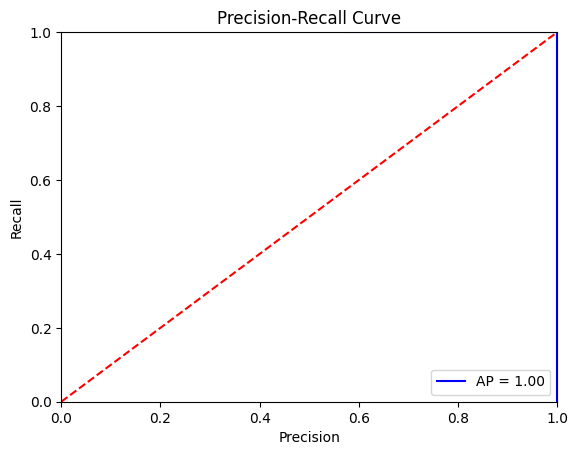

In [30]:
from slideflow.mil import mil_config
from slideflow.mil import train_mil

for i in range(5):

    # Create training and evalutation datasets using label in column 'dataset' from annotations.csv
    train_dataset = project.dataset(tile_px=224, tile_um='40x', filters={f'dataset{i}': 'train'})
    eval_dataset = project.dataset(tile_px=224, tile_um='40x', filters={f'dataset{i}': 'test'})

    config_fastai = mil_config(
        model = 'clam_sb',
        trainer = 'fastai',
        lr=1e-3,
        wd = 1e-5,
        fit_one_cycle = True,
        epochs = 15,
        batch_size = 64,
        dropout=True,
        opt = 'adam',
        inst_loss = 'ce'
    )

    train_mil(
        config = config_fastai,          # mil congifuration
        outcomes = 'category',             # csv target column
        train_dataset = train_dataset,   # train dataset
        val_dataset = eval_dataset,      # eval dataset
        bags = 'bags',                   # path to bags folder
        outdir = f'{project_name}/mil',  # folder to export
        attention_heatmaps = False,       # create attention map
        cmap = 'magma',                  # matplotlib colormap
        interpolation = 'bicubic'        # smoothing heatmaps
    )